<img src=https://riiaa.org/wp-content/uploads/2019/08/logo2.png alt="Drawing" width="400">

# Construcción de Modelos Adversarios usando Keras
### Dr. León Felipe Palafox Novack
### lpalafox@up.edu.mx

### Que no vamos a ver en esta sesión
- Deep Learning (ya hay como 8 talleres)
- Tutorial de Python
- Funcionalidades básicas de Keras y Tensorflow (también lo deberían de haber visto)
- Estadìstica Bayesiana (también ya lo deberían de haber llevado)

# Modelos Adversarios

Basados en la definición de [Russell y Norvig](http://aima.cs.berkeley.edu/), un modelo de multiagentes adversario, es aquel donde la función de maximización de un agente esta en directa contraposición con la función de maximización de otro.

Los casos mas populares de modelos adversarios son los juegos de suma cero.

## Juego de suma cero

Es aquel juego en el cual para que haya un ganador, tiene que haber un perdedor:

### Ejemplos

- Cuando van al mercadito a regatear con la marchanta
- Un juego de ajedrez
- El tráfico en la ciudad de México (no debería)

<img src="https://github.com/leonpalafox/Tutorial-RIIAA/blob/master/images/roadrage.jpeg?raw=true" alt="Drawing" width="400" align="center">



## ¿Por que es importante el estudio de los Juegos de suma cero?

Los juegos de suma cero se utilizan mucho en negociaciones, ya que toda negociación es un juego de suma cero en un principio, pero al final el objetivo subyaciente es comun a ambos participantes.

Al optimizar correctamente juegos de suma cero, podemos crear estrategias corporativas y políticas y corporativas para los diferentes negocios.

# Modelos Generativos

Cuantos tipos de modelos hay?

- Modelos Discriminativos: $P(x|y)$
- Modelos Generativos: $P(y|x)$

### Cuál es la diferencia?

- Los modelos discriminativos modelan las etiquetas a partir de los datos. Generán una distribución de probabilidad sobre el dominio de las etiquetas.

- Los modelos generativos generan una distribución de probabilidad sobre el dominio de los datos

En conclusión, un modelo generativo nos permite tomar muestras aleatorias sobre los datos, es decir, nos permite crear datasets sintéticos.



# Karma de Machine Learning

**Deep Learning es Machine Learning**

- Necesitamos encontrar un modelo que represente el agente que deseamos crear
- Necesitamos encontrar una función de costo que represente como se le va a penalizar al agente por no llegar a sus resultados.
- Necesitamos encontrar un algoritmo de optimización que nos permita reducir esa penalización.



# Redes Generativas

Una red neuronal generativa es una red quea partir de entradas aleatorias, es capaz de generar datos que asemejan un dataset de entrenamiento.

<img src="https://github.com/leonpalafox/Tutorial-RIIAA/blob/master/images/generative_network.png?raw=true" alt="Drawing" width="400" align="center">

¿Como logramos entrenar una red para que a partir de entradas aleatorias, genere datos reales?

In [0]:
# Definimos el modelo generador
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
 
# Definimos el modelo
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model
 
model = define_generator(5)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Generamos puntos aleatorios
from numpy.random import randn

def generate_latent_points(latent_dim, n):
	# generar puntos en la dimension latente
	x_input = randn(latent_dim * n)
	# cambiar el tamaño para que sea consistente con la red
	x_input = x_input.reshape(n, latent_dim)
	return x_input

## Vamos a ver algunas muestras

In [0]:
generate_latent_points(5, 4)

array([[-1.11403334,  0.8248976 , -1.13135496,  1.13437686,  0.55484879],
       [ 0.92813666,  0.27039655, -0.68138125,  1.29795501, -0.74002266],
       [ 0.48812526, -0.90165824,  2.46558928,  0.45424349, -1.25563336],
       [ 1.95646064, -0.04304889,  0.99286658,  1.58122023,  0.48754738]])

## Pasamos esas muestras por la red

In [0]:
import pylab as plt
# Usamos el generador para generar muestras falsas
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# plot the results
	plt.scatter(X[:, 0], X[:, 1])
	plt.show()

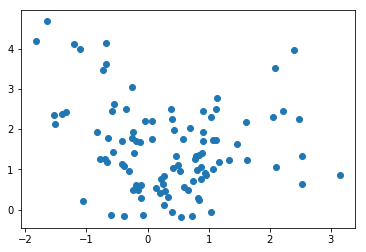

In [0]:
generate_fake_samples(model, 5, 100)

Este modelo está generando salidas *falsas* de una red neuronal, el objetivo es que el dominio sea un dominio real de los datos.

# Modelo Adversario Generativo

Si tuviesemos que hacer un juego para quelos pesos de la red neuronal se modificaran acorde a otra red, como deben ser estas redes.

La red generativa, debe engañar a una red que simplemente esta tratando de clasificar datos.


<img src="https://github.com/leonpalafox/Tutorial-RIIAA/blob/master/images/GAN.png?raw=true" alt="Drawing" width="800" align="center">

- La red $D$ es una red discriminativa, es una red tradicional, y su trabajo es clasificar si el dato es real o falso.

- La red $G$ es el generador, que simplemente se esta encargando de generar datos falsos.

Entonces, el **modelo** son dos redes en conjunto,donde una alimenta a la otra.

- $x_{fake} = g(z;\theta^{(g)})$
- $p(falso | X) = D(x;\theta^{(d)})$

Donde $\theta$ se refiere a los parámetros de la red neuronal correspondiente.

## Cómo ponemos a las redes a pelear entre ellas?

![alt text](https://media.giphy.com/media/8vXvu9TLsfdTb9AWpu/giphy.gif)

- La red $G$ esta tratando de engañar a la red $D$
- La red $D$ está tratando de discernir si una señal es verdadera o falsa.

Definimos entonces una función de costo $v(\theta^{g}, \theta^{d})$

Que creen que debe de satisfacer esa función de costo?



La función de costo debe de satisfacer al mismo tiempo una maximización y una minimización.

$g^* = argmin_gmax_d v(g,d)$ 

Una función que satisface esta condición puede ser

$v(\theta^{(g)}, \theta^{(d)}) = \mathbb{E}_{x\sim pdata}\log d(x) + \mathbb{E}_{x\sim pmodel}\log (1-d(x))$

Esta función esta forzando al discriminador a determinar si los datos son reales o falsos, al mismo tiempo hace que el generador trate de engañar al modelo.

En convergencia, las muestras del generador son indistinguibles de datos reales, y el discriminador da 0.5 para todas las muestras.

#En resumen

[Estos son del tutorial de GAN de Tensorflow mismo
](https://colab.research.google.com/github/tensorflow/docs/blob/r2.0rc/site/en/r2/tutorials/generative/dcgan.ipynb#scrollTo=2MbKJY38Puy9)

![A diagram of a generator and discriminator](https://tensorflow.org/beta/tutorials/generative/images/gan1.png)

![A second diagram of a generator and discriminator](https://tensorflow.org/beta/tutorials/generative/images/gan2.png)



# Vamos a generar una GAN muy sencilla

Ya tenemos un generador que genera *basura*

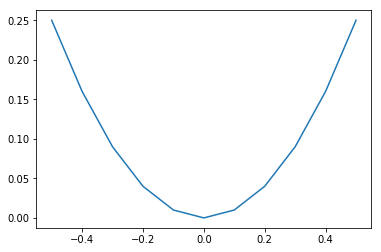

In [0]:

# Vamos a generar una función dummy
from matplotlib import pyplot
 
# funcion
def calculate(x):
	return x * x
 
# definir entradas
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
# salidas
outputs = [calculate(x) for x in inputs]
# graficar
pyplot.plot(inputs, outputs)


### Vamos a generar puntos aleatorios que vienen de la misma función

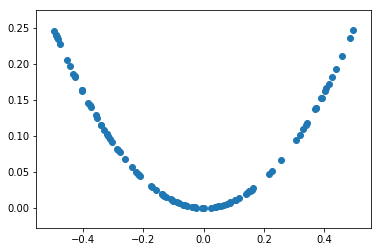

In [0]:

# example of generating random samples from X^2
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot
 
# generate randoms sample from x^2
def generate_samples(n=100):
	# generate random inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2 (quadratic)
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	return hstack((X1, X2))
 
# generate samples
data = generate_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])


In [0]:
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 25)                75        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [0]:

# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

In [0]:
# generate n fake samples with class labels
def generate_fake_samples(n):
	# generate inputs in [-1, 1]
	X1 = -1 + rand(n) * 2
	# generate outputs in [-1, 1]
	X2 = -1 + rand(n) * 2
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = zeros((n, 1))
	return X, y

In [0]:
def train_discriminator(model, n_epochs=1000, n_batch=128):
	half_batch = int(n_batch / 2)
	# run epochs manually
	for i in range(n_epochs):
		# generate real examples
		X_real, y_real = generate_real_samples(half_batch)
		# update model
		model.train_on_batch(X_real, y_real)
		# generate fake examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update model
		model.train_on_batch(X_fake, y_fake)
		# evaluate the model
		_, acc_real = model.evaluate(X_real, y_real, verbose=0)
		_, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
		print(i, acc_real, acc_fake)
 
#define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)

0 0.75 0.3125
1 0.828125 0.28125
2 0.703125 0.359375
3 0.65625 0.25
4 0.734375 0.21875
5 0.640625 0.359375
6 0.765625 0.359375
7 0.6875 0.28125
8 0.71875 0.296875
9 0.703125 0.28125
10 0.6875 0.328125
11 0.6875 0.25
12 0.59375 0.265625
13 0.640625 0.390625
14 0.640625 0.28125
15 0.5625 0.421875
16 0.5625 0.296875
17 0.59375 0.28125
18 0.5625 0.21875
19 0.71875 0.34375
20 0.46875 0.359375
21 0.546875 0.34375
22 0.671875 0.21875
23 0.5625 0.265625
24 0.484375 0.28125
25 0.53125 0.296875
26 0.59375 0.265625
27 0.53125 0.359375
28 0.46875 0.25
29 0.453125 0.328125
30 0.390625 0.328125
31 0.484375 0.265625
32 0.484375 0.265625
33 0.421875 0.34375
34 0.375 0.359375
35 0.53125 0.328125
36 0.453125 0.453125
37 0.328125 0.34375
38 0.421875 0.296875
39 0.4375 0.375
40 0.484375 0.28125
41 0.40625 0.234375
42 0.453125 0.359375
43 0.46875 0.421875
44 0.421875 0.375
45 0.34375 0.21875
46 0.421875 0.265625
47 0.4375 0.4375
48 0.421875 0.328125
49 0.421875 0.375
50 0.34375 0.34375
51 0.5 0.375
52 0.42

## Hasta este momento tenemos ya una red que sabe como clasificar falsos de verdaderos.

Ya tenemos las dos mitades, un generador que genera falsos, y una red que clasifica falsos de verdaderos.


In [0]:

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [0]:
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_19 (Sequential)   (None, 2)                 122       
_________________________________________________________________
sequential_18 (Sequential)   (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


In [0]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=10000, n_batch=128):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)


In [0]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n, 1))
	return X, y
 
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

In [0]:

# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()

In [0]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1999 0.5 0.37


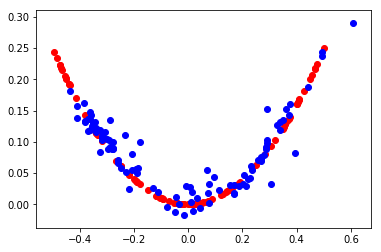

3999 0.7 0.54


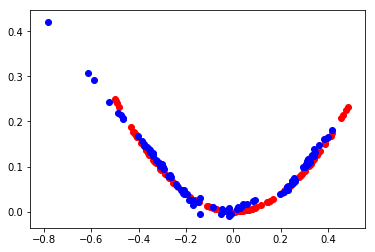

5999 0.65 0.41


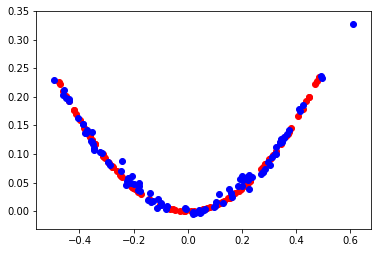

7999 0.36 0.65


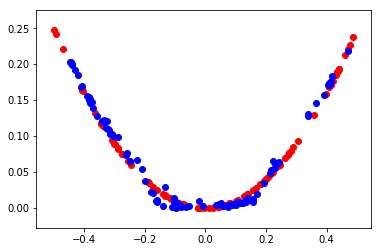

9999 0.66 0.23


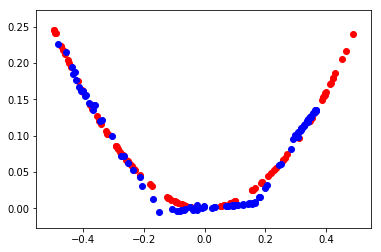

In [0]:
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

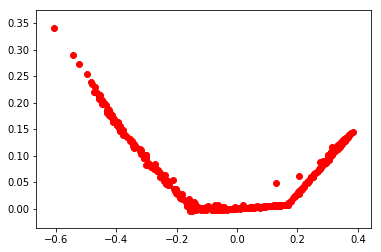

In [0]:
x,y = generate_fake_samples(generator, latent_dim, 500)
pyplot.scatter(x[:, 0], x[:, 1], color='red')


# Modelos generativos con redes convolutivas

Que pasa si queremos generar imagenes, en lugar de redes tradicionales, usamos redes neuronales convolutivas.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
from IPython import display
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import tensorflow as tf
tf.enable_eager_execution()


# El ejemplo básico de cualquier tutorial es MNIST

MNIST es un dataset que contiene números escritos a mano, y el objetivo por lo general es crear clasificadores capaces de distinguir los números.

In [0]:
# Cargamos MNIST
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalizar imagen a [-1, 1]


In [0]:
train_images = train_images[0:10000,:,:,:]

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

Creamos nuestro gernerador, una red que crea imagenes aleatorias dada una entrada.

In [0]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

Como en el caso anterior, podemos crear un generador que genere imagenes aleatorias.

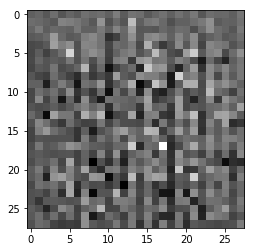

In [0]:

generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [0]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [0]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[8.2860846e-05]], shape=(1, 1), dtype=float32)


In [0]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [0]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [0]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [0]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [0]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [0]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [0]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)


    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [0]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

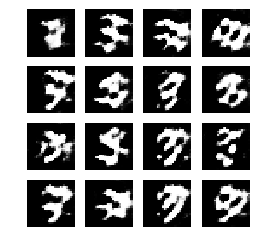

CPU times: user 53.3 s, sys: 16.6 s, total: 1min 9s
Wall time: 1min 59s


In [0]:
%%time
train(train_dataset, EPOCHS)
#Sin GPU, una sola epoca se tarda 741 segundos

In [0]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
  display.Image(filename=anim_file)

# Referencias

- [Inteligencia Artificial Moderna, Russell y Norvig](http://aima.cs.berkeley.edu/)
- [Machine Learning and Pattern Recognition, Bishop](https://www.springer.com/gp/book/9780387310732)
- [Deep Learning, Bengio](https://www.deeplearningbook.org/)
- [Artículo Seminal de GAN, Ian Goodfellow](https://arxiv.org/abs/1406.2661)
- [Sesion de GAN en el curso de Intro a Deep Learning del MIT](http://introtodeeplearning.com/materials/2019_6S191_L4.pdf)
- [Tutorial de GAN en el CVPR](https://sites.google.com/view/cvpr2018tutorialongans/)
- [Tutorial de GAN en Tensorflow](https://colab.research.google.com/github/tensorflow/docs/blob/r2.0rc/site/en/r2/tutorials/generative/dcgan.ipynb#scrollTo=CA1w-7s2POEy)
- [Tutorial de GAN en NIPS 2017](https://arxiv.org/pdf/1701.00160.pdf)